In [114]:
import numpy as np
import pandas as pd
weight = 0.7
bias = 0.3
start = 0
stop = 1
step = 0.02
x = np.arange(start, stop, step)
y = weight * x + bias
data = {'x': x,
        'y': y
}
frame = pd.DataFrame(data)
frame.head()

,x,y
0,0.00,0.300
1,0.02,0.314
2,0.04,0.328
3,0.06,0.342
4,0.08,0.356


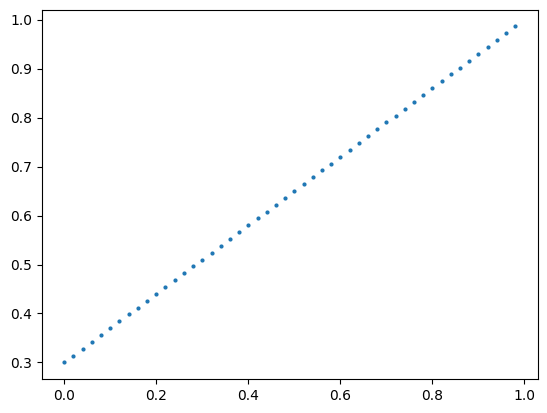

In [115]:
import matplotlib.pyplot as plt
plt.scatter(x, y, 4)

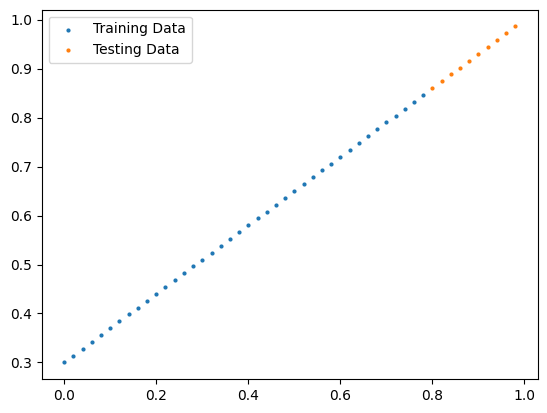

In [275]:
import torch
trainingSplit = int(0.8 * len(x))
XTrain = torch.from_numpy(x[:trainingSplit]).to(torch.float).unsqueeze(1)
yTrain = torch.from_numpy(y[:trainingSplit]).to(torch.float).unsqueeze(1)
XTest = torch.from_numpy(x[trainingSplit:]).to(torch.float).unsqueeze(1)
yTest = torch.from_numpy(y[trainingSplit:]).to(torch.float).unsqueeze(1)
plt.scatter(XTrain, yTrain, 4, label='Training Data')
plt.scatter(XTest, yTest, 4, label='Testing Data')
plt.legend()

In PyTorch's torch.nn there is a class called Linear that provides initial random weight and bias. The formula for a linear function is y = xA + b, where A is the weight and b is the bias.

In [256]:
from torch import nn
model = nn.Linear(1, 1)
model.state_dict()

OrderedDict([('weight', tensor([[0.8135]])), ('bias', tensor([0.9719]))])

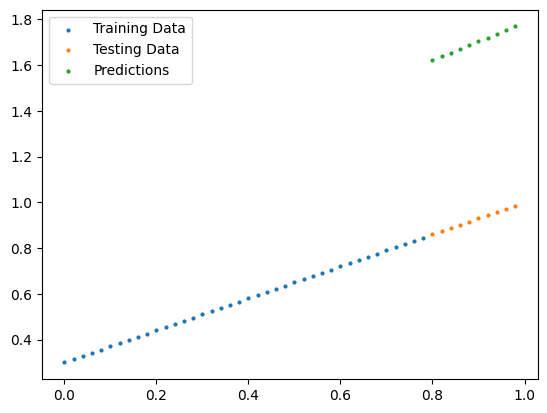

In [263]:
# turns off requires grad
with torch.inference_mode():
    yPreds = model(XTest)
plt.scatter(XTrain, yTrain, 4, label='Training Data')
plt.scatter(XTest, yTest, 4, label='Testing Data')
plt.scatter(XTest, yPreds, 4, label='Predictions')
plt.legend()

The loss function measures the mean absolute error between the model's predictions and the actual data. Mean absolute error is the average distance between the prediction and the true value. It is calculated as the sum of all the absolute values of each predictions minus the each true value divided by the number of predictions.
The optimizer is what changes the parameters of a function. This optimizer uses stochastic gradient descent (SGD).

In [277]:
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters())
epochs = 1000
for epoch in range(epochs):
    model.train()
    yPreds = model(XTrain)
    loss = loss_fun(yPreds, yTrain)